## Day 35 Lecture 2 Assignment

In this assignment, we will combine what we have learned so far about classification algorithms this week.

In [26]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

In [27]:
admission = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Admission_Predict.csv')

In [28]:
admission.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In this assignment, we will predict the probability of a student being admitted to a PhD program given their stats. To make the predictions, find the median for the Chance of Admit column. Create an admit column where all probabilities above the median will receive a 1 for that column and all probabilities below the median will be a zero.

Below you will process and clean the data, try the SVM classifier, the gradient boosted decision tree classifier and XGBoost, and compare your results.

Have fun!

In [29]:
threshold = admission['Chance of Admit '].median()
admission['Admit'] = np.where(admission['Chance of Admit '] >= threshold, 1, 0)

In [30]:
missingness_summary(admission)

Serial No.           0.0
GRE Score            0.0
TOEFL Score          0.0
University Rating    0.0
SOP                  0.0
LOR                  0.0
CGPA                 0.0
Research             0.0
Chance of Admit      0.0
Admit                0.0
dtype: float64

In [31]:
X = admission.drop(columns=['Chance of Admit ', 'Serial No.'])

In [32]:
#Size of the test set and target variable to split the data.
df = X
target = 'Admit'
SIZE = 0.2

y = df[target]
X = df.drop(columns=[target])

from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=SIZE)
print('There are {:d} training samples and {:d} test samples'.format(X_train.shape[0], X_test.shape[0]))

There are 320 training samples and 80 test samples


In [33]:
X.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000


In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#SVM classifier, the gradient boosted decision tree classifier and XGBoost
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
svc.fit(X_test, y_test)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [44]:
train_pred_svc = svc.predict(X_train)
test_pred_svc = svc.predict(X_test)
train_errs = error_table(train_pred_svc, y_train, 'SVC')
errs.head()

,prediction,actual,err,err_size,isErr,model
250,0,1,-1,1,1,SVC
339,0,1,-1,1,1,SVC
131,0,1,-1,1,1,SVC
264,0,1,-1,1,1,SVC
70,0,1,-1,1,1,SVC


In [36]:
#Returns an dataframe of my predicted data, actual data, and the errors
def error_table(pred, actual, model=None):
  errs = pd.DataFrame({'prediction': pred, 'actual': actual})
  errs['err'] = pred - actual
  errs['err_size'] = abs(pred - actual)
  errs['isErr'] = np.where(errs['err_size'] > 0, 1, 0)
  if model is not None:
    errs['model'] = model
  return errs

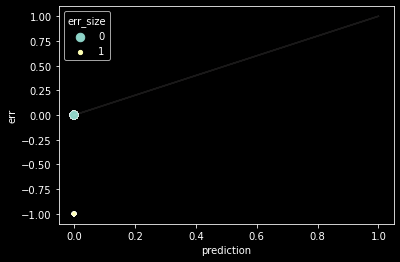

In [67]:
import seaborn as sns
#Provides a visualization of the errors vs. predictions (residual plot)
#Perfection!
plt.style.use(['dark_background'])
plt.plot(errs['actual'], errs['actual'], alpha=.1, color='#F9EDF5')
sns.scatterplot(data=errs, x='prediction', y='err', hue='err_size', size='err_size', alpha=0.5)
plt.show()

#Oh. I need a confusion matrix. Whoops. I was so excited to show off my little prediction thingy too! Oh well. 

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_train, train_pred_svc))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       159
           1       0.89      0.84      0.86       161

    accuracy                           0.87       320
   macro avg       0.87      0.87      0.87       320
weighted avg       0.87      0.87      0.87       320



In [46]:
confusion_matrix(y_train, train_pred_svc)

array([[142,  17],
       [ 26, 135]])

In [47]:
confusion_matrix(y_test, test_pred_svc)

array([[36,  1],
       [ 6, 37]])

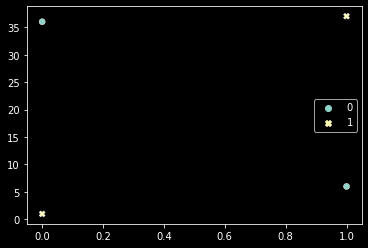

In [54]:
sns.scatterplot(data=confusion_matrix(y_test, test_pred_svc))

In [ ]:
#A summary of missing variables represented as a percentage of the total missing content. 
def missingness_summary(df, print_log=False, sort='ascending'):
  s = df.isnull().sum()*100/df.isnull().count()
    
  if sort.lower() == 'ascending':
    s = s.sort_values(ascending=True)
  elif sort.lower() == 'descending':
    s = s.sort_values(ascending=False)  
  if print_log: 
    print(s)
  
  return pd.Series(s)

In [69]:
#the gradient boosted decision tree classifier 
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

train_gbc_predict = gbc.predict(X_train)
print(classification_report(y_train, train_gbc_predict))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       159
           1       0.98      0.99      0.98       161

    accuracy                           0.98       320
   macro avg       0.98      0.98      0.98       320
weighted avg       0.98      0.98      0.98       320



In [70]:
#and XGBoost
!pip install XGBoost

In [71]:
grc = GradientBoostingClassifier()
grc.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [74]:
train_pred_grc = grc.predict(X_train)
print(classification_report(y_train, train_pred_grc))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       159
           1       0.98      0.99      0.98       161

    accuracy                           0.98       320
   macro avg       0.98      0.98      0.98       320
weighted avg       0.98      0.98      0.98       320



In [79]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_train, grc.decision_function(X_train))

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 1.00


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=1.00')

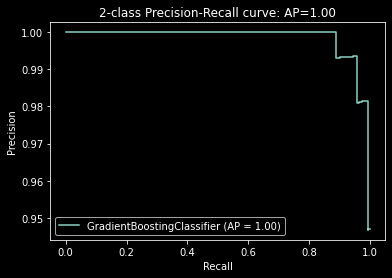

In [81]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(grc, X_train, y_train)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))